<a href="https://colab.research.google.com/github/valllllll2000/data-mining-course/blob/main/DataMiningAlzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto para el curso de Data Mining en CodeOp

## Programa de la presentación

1. Presentarnos:

  Marie Coutart,
  Carolina Kaechele,
  Jocelyn Castro,
  Valeria Rogatchevskikh
2. Problematica y objectivos del proyecto

  * Predecir el Alzheimer teniendo datos clinicos del paciente como el MMSE (examen del estado mental), el CDR (Clasificación clinica de la demencia) y el volumen del cerebro.
  * Analizar el riesgo de patir Alzheimer segun ciertas factores socioeconomicos como: la edad, el nivel de educación, el nivel sociocultural.
  * Posibilidad de usar conclusiones para software de diagnostico

3. Resumir, descripcion de los datos y de la base de datos
Base de datos de Kaggle
Link: https://www.kaggle.com/datasets/brsdincer/alzheimer-features

10 Columnas y ~373 lineas

- **Grupo** --> Clase, posibles valores: Demented, Nondemented, Converted
- **Edad** --> Edad, de 60 a 98
- **EDUC** --> Años de Educación, de 6 a 23
- **SES** --> Estado Socioeconómico / 1 (Bajo) - 5 (Alto)
- **MMSE** --> Examen del Estado Mental Mínimo de 4 (Demencia severa) a 30 (Sin demencia)
- **CDR** --> Clasificación Clínica de Demencia de 0 (sin demencia) a 2 (con demencia)
- **eTIV** --> Volumen Intracraneal Total Estimado de 1106 a 2024
- **nWBV** --> Volumen Total del Cerebro Normalizado 0,64 a 0,84
- **ASF** --> Factor de Escalamiento del Atlas 0,88 a 1,59

#### 1. MMSE (Examen del Estado Mental Mínimo)
Evalua la función cognitiva (memoria, orientación, atención y lenguaje). La puntuación total varía de 0 a 30, una puntuación inferior a 24 sugiere posible demencia, cuanto más bajo peor es el estado de demencia.

####  2. CDR (Clasificación Clínica de Demencia)
Evalue la gravedad de la demencia basada en entrevistas y evaluaciones clínicas. Evalúa las habilidades cognitivas y funcionales en diferentes dominios.  
Varía de 0 (sin demencia) a 3 (demencia severa).

####  3. eTIV (Volumen Intracraneal Total Estimado)
Medida del volumen total dentro del cráneo, que incluye el cerebro, el líquido cefalorraquídeo y otras estructuras. Rango de 1,200 a 1,800 cm³ para adultos.  
- **Hombres:** de 1,400 a 1,600 cm³.  
- **Mujeres:** de 1,100 a 1,400 cm³.  
Puede haber variaciones individuales basadas en la edad, el sexo y la demografía de la población.

####  4. nWBV (Volumen Total del Cerebro Normalizado)
Representa el volumen total del cerebro normalizado por el volumen intracraneal total (eTIV). Ayuda a evaluar la atrofia cerebral, util para el estudio de enfermedades degenerativas. Porcentaje del volumen intracraneal total. Normalmente varía del 75% al 95% del eTIV.  
Un nWBV normal podría estar alrededor del 80% al 90%.
Los valores más bajos pueden indicar atrofia cerebral, común en condiciones como el Alzheimer.

####  5. ASF (Factor de Escalamiento del Atlas)
Un factor utilizado para escalar datos de neuroimagen a un atlas estándar, permitiendo comparaciones entre sujetos.

4. Limpieza de datos, explicar el porque y enseñar codigo
5. Analisis exploratorio:
  - Exploración de datos: mostrar datos con graficas, por ejemplo por edad, sexo, educacion
  - Mostrar las graficas outliers (Joselyn las tenia muy bien hechas)
  - Correlaciones?? kendall o otro?
  - Llegar a conclusiones
6. Mineria de datos:
  - Arbol de decision
  - Arbol de clasificacion y evaluar las metricas, validacion cruzada?
7. Evaluación del modelo y resultados
8. Crear presentación en Canva y añadir capturas??


Ideas de conclusiones:
* Educacion y posibilidad de tener Alzheimer
* Importancia del factor socio economico: si o no?
* Atrofia cerebral (nWBV)
* Edad


In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/valllllll2000/data-mining-alzheimer/refs/heads/main/alzheimer.csv'
df = pd.read_csv(url)

#organizacion de los datos:
# Mostrar las primeras filas
print(df.head())
print('\n')

# Información general del dataset
print(df.info())
print('\n')

# Estadísticas generales
print(df.describe())
print('\n')

         Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0  Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1  Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
2     Demented   M   75    12  NaN  23.0  0.5  1678  0.736  1.046
3     Demented   M   76    12  NaN  28.0  0.5  1738  0.713  1.010
4     Demented   M   80    12  NaN  22.0  0.5  1698  0.701  1.034


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage:

Aqui podemos ver las columnas y lineas y vemos que en las columnas SES y MMSE faltan datos para algunas filas.

In [ ]:
# Limpieza de datos
# Rellenamos con la mediana para las columnas MMSE y SES
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].median())
df['SES'] = df['SES'].fillna(df['SES'].median())

# Información general del dataset
print(df.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB
None




In [ ]:
# Calucular media
mmse_median = df.groupby('Group')['MMSE'].mean()
display(mmse_median)
cdr_median = df.groupby('Group')['CDR'].mean()
display(cdr_median)
nWBV_median = df.groupby('Group')['nWBV'].mean()
display(nWBV_median)

,MMSE
Group,
Converted,28.675676
Demented,24.575342
Nondemented,29.226316


,CDR
Group,
Converted,0.256757
Demented,0.671233
Nondemented,0.005263


,nWBV
Group,
Converted,0.723730
Demented,0.716301
Nondemented,0.740900


Conclusiones: los datos no permiten determinar con seguridad si la clase Converted se refiere a personas que han pasado de sanos a dementes o al revés y por eso para nuestro analisis decidimos borrar (limpiar) estos datos

In [ ]:
# Limpiamos las filas que contienen Converted
df = df[df['Group'] != 'Converted']
print(df.info())

print('\n')

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   336 non-null    object 
 1   M/F     336 non-null    object 
 2   Age     336 non-null    int64  
 3   EDUC    336 non-null    int64  
 4   SES     336 non-null    float64
 5   MMSE    336 non-null    float64
 6   CDR     336 non-null    float64
 7   eTIV    336 non-null    int64  
 8   nWBV    336 non-null    float64
 9   ASF     336 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 28.9+ KB
None




Age Median:  76.0
EDUC Median:  14.0
SES Median:  2.0
MMSE Median:  29.0
CDR Median:  0.0
eTIV Median:  1475.0
nWBV Median:  0.731
ASF Median:  1.19


<bound method NDFrame.head of            Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0    Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1    Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
2       Demented   M   75    12  2.0  23.0  0.5  1678  0.736  1.046
3       Demented   M   76    12  2.0  28.0  0.5  1738  0.713  1.010
4       Demented   M   80    12  2.0  22.0  0.5  1698  0.701  1.034
..           ...  ..  ...   ...  ...   ...  ...   ...    ...    ...
368     Demented   M   82    16  1.0  28.0  0.5  1693  0.694  1.037
369     Demented   M   86    16  1.0  26.0  0.5  1688  0.675  1.040
370  Nondemented   F   61    13  2.0  30.0  0.0  1319  0.801  1.331
371  Nondemented   F   63    13  2.0  30.0  0.0  1327  0.796  1.323
372  Nondemented   F   65    13  2.0  30.0  0.0  1333  0.801  1.317

[3

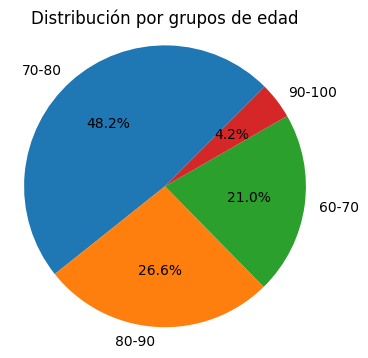

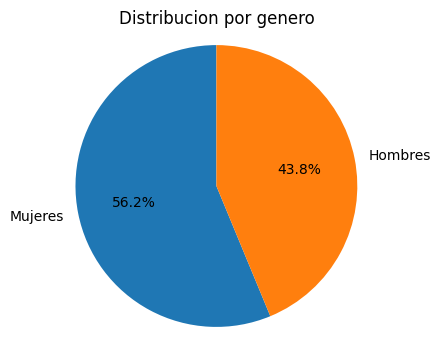

In [ ]:
import matplotlib.pyplot as plt
# Exploracion, graficos...
# Calculo medianas
print('Age Median: ', df['Age'].median())
print('EDUC Median: ', df['EDUC'].median())
print('SES Median: ', df['SES'].median())
print('MMSE Median: ', df['MMSE'].median())
print('CDR Median: ', df['CDR'].median())
print('eTIV Median: ', df['eTIV'].median())
print('nWBV Median: ', df['nWBV'].median())
print('ASF Median: ', df['ASF'].median())
print("\n")

print(df.head)

# Grafico por edad
age_bins = [60, 70, 80, 90, 100]
age_labels = ['60-70', '70-80', '80-90', '90-100']

# Nueva columna con groupos de edad
df.loc[:, 'Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Contar totales por cada groupo de edad
age_group_counts = df['Age_Group'].value_counts()

# Crear grafico
plt.figure(figsize=(4, 4))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=45)
plt.title('Distribución por grupos de edad')
plt.axis('equal')
plt.show()

print("\n")
#Contar ocorrencias por genero
gender_group_count = df['M/F'].value_counts()

# Crear grafico
plt.figure(figsize=(4, 4))
plt.pie(gender_group_count, labels=['Mujeres', 'Hombres'], autopct='%1.1f%%', startangle=90)
plt.title('Distribucion por genero')
plt.axis('equal')
plt.show()

# Outliers

In [ ]:
# Calcular estadísticas
media = df_numerico.mean()
mediana = df_numerico.median()
moda = df_numerico.mode().iloc[0]

NameError: name 'df_numerico' is not defined